# Importing of Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sb.set()

# Exploratory Data Analysis
We conduct 2 Exploratory Data Analysis (EDA) to find out some early relationships:

1. Economy Advantage in relation to the round's winner
2. Terrorist/Counter-Terrorist Win rate on each map

In [ ]:
clean = pd.read_csv("/data/clean.csv") #Import data that is exported after data cleaning
cleancopy = clean #Copy of the data frame for EDA

In [4]:
#Splitting the cleaned dataframe into 80/20 for train/test ML
train = cleancopy.sample(frac = 0.8, random_state = 100)
train.shape


(32928, 129)

In [5]:
#Creating test dataframe by dropping train data from cleancopy.
test = cleancopy.drop(index = train.index) #DO NOT USE TEST DATA UNTIL FOR ACTUAL TEST OF MODEL
test.shape

(8232, 129)

In [6]:
#Taking 30% of train data to run EDA on

edadata = train.sample(frac = 0.3, random_state = 100)
edadata.shape

(9878, 129)

In [7]:
edadata.head()

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,21_advantage,22_advantage,23_advantage,24_advantage,25_advantage,26_advantage,27_advantage,28_advantage,29_advantage,30_advantage
2541,2019-12-08,2338286,2606,pro100,HellRaisers,3,Train,t,ct,4200.0,...,-4950.0,-23000.0,-1200.0,-22300.0,3700.0,4750.0,1300.0,-15100.0,5.0,5.0
17239,2018-11-21,2329365,4265,HAVU,Windigo,3,Train,t,ct,3150.0,...,8350.0,10850.0,8100.0,22700.0,27700.0,9000.0,13750.0,16600.0,3800.0,17950.0
29255,2018-03-17,2320933,3624,Property,LPSP,3,Mirage,ct,t,4350.0,...,-3450.0,-9550.0,20700.0,-16700.0,12300.0,-22050.0,-31550.0,-4150.0,5.0,5.0
458,2020-02-16,2339600,5213,Bravos,Redemption POA,3,Dust2,ct,t,4350.0,...,-20500.0,-3950.0,-1950.0,22800.0,0.0,19000.0,-6000.0,-100.0,-3900.0,-19100.0
7598,2019-08-13,2335422,4760,OFFSET,The Final Tribe,3,Dust2,ct,t,4250.0,...,19900.0,1800.0,900.0,-5250.0,-950.0,5.0,5.0,5.0,5.0,5.0


## Part 1: Economic Advantage and Round Outcome

In [8]:
edaEconomy = pd.DataFrame(columns=["Advantage", "Result"]) #Economic advantage vs winner relationship

In [9]:
edadataCopy = edadata

In [10]:
for i in range(1,31):
  advantageString  = str(i) + "_advantage"
  winnerString = str(i) + "_winner"

  
  tempFrame = pd.concat([edadataCopy[advantageString], edadataCopy[winnerString]], ignore_index = True, axis = 1)
  tempFrame.rename(columns = {0: 'Advantage', 1: 'Result'}, inplace = True)

  edaEconomy = pd.concat([edaEconomy, tempFrame], axis = 0, ignore_index = True)


### Note: A Positive advantage means that Team 1 spent more for that round than Team 2, and vice versa

In [11]:
edaEconomy = edaEconomy[edaEconomy.Result != 0] #drop rounds with no outcome
edaEconomy = edaEconomy[edaEconomy.Advantage != 5] #Drop rounds not played (See Data Cleaning: We initialised Team 1's spendings as 5 and Team 2's as 0 for rounds not played)

In [12]:
edaEconomy["Result"].value_counts() #check how close in count

1.0    128711
2.0    121367
Name: Result, dtype: int64

In [13]:
sb.set(style = 'whitegrid')

### Visualisation

<AxesSubplot:xlabel='Result', ylabel='count'>

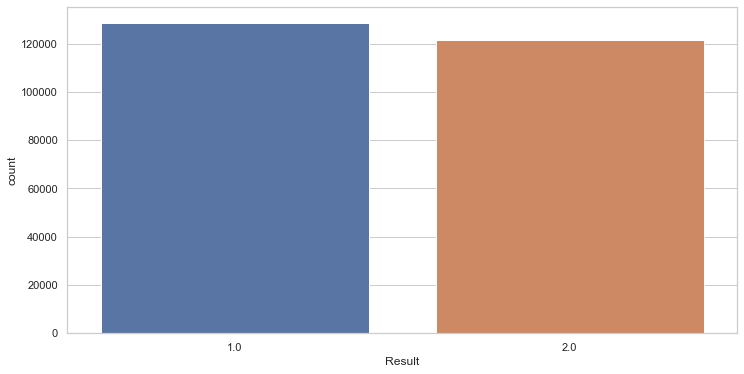

In [14]:
f = plt.figure(figsize=(12, 6))

sb.countplot(x = edaEconomy['Result']) 

From the bar graph, we observed that Team 1 has a higher win count than Team 2. This could be attributed to sample bias as it should theoretically be 50/50.

<AxesSubplot:xlabel='Advantage', ylabel='Count'>

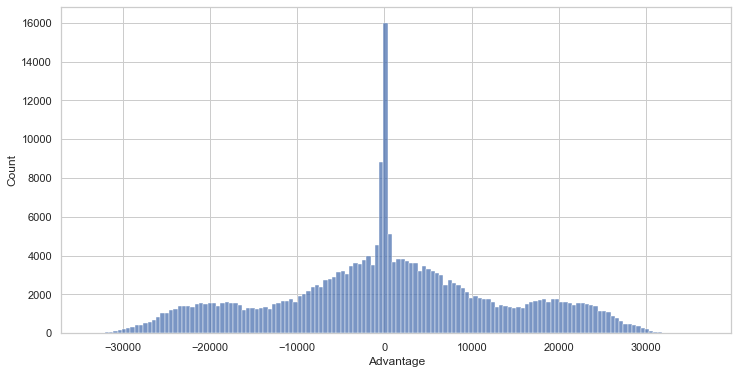

In [15]:
f = plt.figure(figsize=(12, 6))

sb.histplot(data = edaEconomy, x = edaEconomy['Advantage']) #very symmetric plot

<AxesSubplot:xlabel='Advantage'>

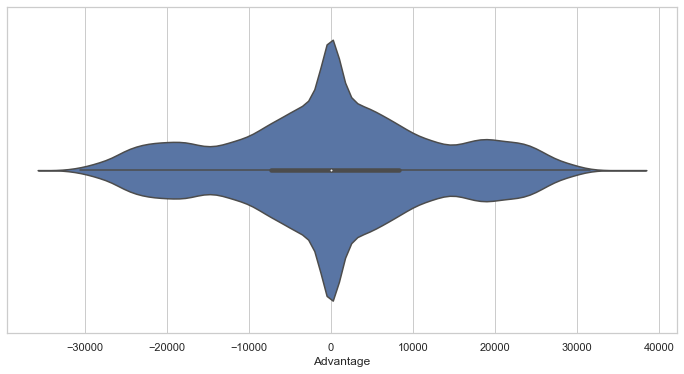

In [16]:
f = plt.figure(figsize=(12, 6))

sb.violinplot(x = edaEconomy['Advantage'], gridsize=100, width=0.8) #very symmetric plot

In [17]:
edaEconomy["Advantage"].describe()

count    250078.000000
mean        379.513792
std       13025.817576
min      -33550.000000
25%       -7250.000000
50%          50.000000
75%        8250.000000
max       36250.000000
Name: Advantage, dtype: float64

### Observation and Conclusions

From the histogram and violin plot, we can draw some observations:


1.   There are many round where there is little to no economic advantage from either team. The mean being at 379.5 means there is a slight advantage from team 1 in economy. This may explain why the bar plot above has a slightly higher win count for team 1.

2.   The symmetric plot indicates that either team 1 or 2 can have the same amount of economic advantage over the other team. Hence there is no bias towards either team forming a significant economic advantage.





## Part 2: Counter-Terrorist win rate on each map

In [18]:
edadataCopy2 = edadata

roundlist = edadataCopy2.columns
roundlist = roundlist[6:9].append(roundlist[69:99])

In [19]:
mapeda = edadataCopy2[roundlist]
mapeda.head()

,_map,t1_start,t2_start,1_winner,2_winner,3_winner,4_winner,5_winner,6_winner,7_winner,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
2541,Train,t,ct,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0
17239,Train,t,ct,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
29255,Mirage,ct,t,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0
458,Dust2,ct,t,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
7598,Dust2,ct,t,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [20]:
indexlist = mapeda.index.tolist()
maplist = list(set(edadataCopy2["_map"].tolist()))

In [21]:
mapframe = pd.DataFrame(columns = ["map", "ct_wins", "total_rounds"])
mapframe["map"] = maplist
mapframe["ct_wins"] = 0
mapframe["total_rounds"] = 0

In [ ]:
for item in indexlist:
    ct_win = 0
    rounds = 0
    if mapeda.loc[item]['t1_start'] == "ct":
      ct_win += mapeda.loc[item]["1_winner" : "15_winner"].tolist().count(1)
      ct_win += mapeda.loc[item]["16_winner" : "30_winner"].tolist().count(2)

    elif mapeda.loc[item]['t1_start'] == "t":
      ct_win += mapeda.loc[item]["1_winner" : "15_winner"].tolist().count(2)
      ct_win += mapeda.loc[item]["16_winner" : "30_winner"].tolist().count(1)

    rounds = 30 - mapeda.loc[item]["1_winner" : "30_winner"].tolist().count(0)

    for index in mapframe.index:
      if mapframe.loc[index]["map"] == edadataCopy2.loc[item]["_map"]:
        mapframe["ct_wins"][index] += ct_win
        mapframe["total_rounds"][index] += rounds



In [23]:
mapframe["ct_percentage"] =  mapframe["ct_wins"] / mapframe["total_rounds"] 

### Visualisation

<AxesSubplot:xlabel='map', ylabel='ct_percentage'>

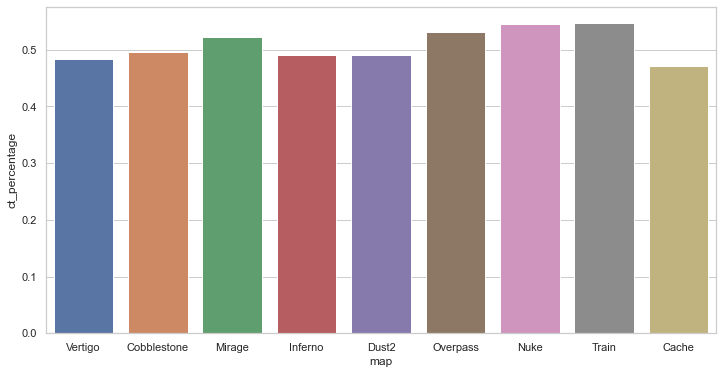

In [24]:
#bar graph

sb.set(style = 'whitegrid')
f = plt.figure(figsize=(12, 6))
sb.barplot(x = mapframe["map"], y= mapframe["ct_percentage"])


### Observations and Conclusions

Here we observe that there is some map bias present on certain maps in the competitive map pool. 
1. Most notably Train, Nuke and Overpass are Counter-Terrorists favoured.
2. Cobblestone is the closest to being a "fair" map with a Counter-Terrorist win rate that is closest to 50%.

# Exporting of Train/Test Dataframes for Machine Learning

In [26]:
train.to_csv("/data/train.csv", index = False)

In [27]:
test.to_csv("/data/test.csv", index = False)